# Library Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset

In [2]:
df = pd.read_csv("new_insurance_data - Harshit Trivedi.csv")
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


# EDA

In [3]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [5]:
df.shape

(1338, 13)

In [6]:
df.nunique()

age                                  47
sex                                   2
bmi                                 547
children                              6
smoker                                2
Claim_Amount                       1324
past_consultations                   39
num_of_steps                       1335
Hospital_expenditure               1334
NUmber_of_past_hospitalizations       4
Anual_Salary                       1332
region                                4
charges                            1337
dtype: int64

In [7]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


<Axes: >

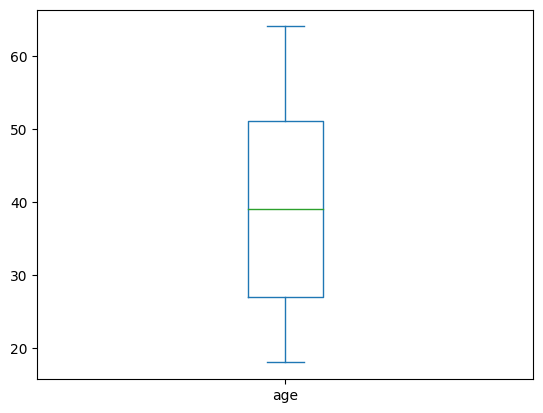

In [8]:
df['age'].plot(kind='box') # checking of outlier in age column

In [9]:
df.sex.value_counts() # balance checking between male and female in sex column

sex
male      676
female    662
Name: count, dtype: int64

<Axes: >

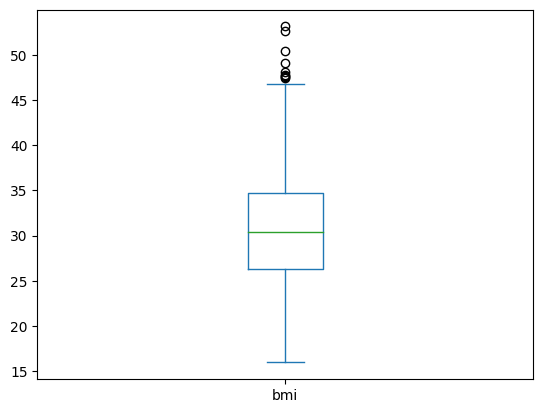

In [10]:
df.bmi.plot(kind='box') # checking for outlier in bmi column

In [11]:
# BMI column analysis
bmi_iqr = df.bmi.quantile(0.75) - df.bmi.quantile(0.25)
print("BMI IQR: ",bmi_iqr)
bmi_upper_bound = df.bmi.quantile(0.75)+bmi_iqr*1.5
print('BMI Upper Bound: ', bmi_upper_bound)
bmi_outlier = df[df.bmi>bmi_upper_bound]
print('Number of Outlier in BMI: ', len(bmi_outlier))
bmi_outlier

BMI IQR:  8.384999999999998
BMI Upper Bound:  47.265
Number of Outlier in BMI:  9


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
9,18.0,male,53.13,0.0,no,17046.58515,19.0,704425.0,1.458972e+06,0.0,9.426182e+07,southeast,1163.46270
140,23.0,male,50.38,1.0,no,23610.05685,11.0,772220.0,7.112563e+06,0.0,3.511065e+07,southeast,2438.05520
577,47.0,male,47.52,1.0,no,36567.00628,18.0,888009.0,9.703705e+06,1.0,1.342259e+08,southeast,8083.91980
673,46.0,female,48.07,2.0,no,49537.39756,6.0,921480.0,7.421073e+06,1.0,1.441859e+08,northeast,9432.92530
694,52.0,male,47.74,1.0,no,12957.70404,17.0,927445.0,1.050127e+07,1.0,1.892394e+08,southeast,9748.91060
800,58.0,male,49.06,0.0,no,27551.28816,14.0,930603.0,1.126201e+07,1.0,1.603072e+08,southeast,11381.32540
1297,22.0,male,52.58,1.0,yes,58019.55109,26.0,1070847.0,9.354827e+07,2.0,2.001538e+09,southeast,44501.39820
1304,37.0,female,47.60,2.0,yes,37088.16328,30.0,1061520.0,1.003198e+08,2.0,2.202513e+09,southwest,46113.51100
1337,54.0,female,47.41,0.0,yes,63982.80926,31.0,1100328.0,2.616317e+08,3.0,4.117197e+09,southeast,63770.42801


In [12]:
# Smoker column analysis
df.smoker.value_counts()
smoker = len(df[df.smoker=='yes'])
non_smoker = len(df[df.smoker=='no'])
smokers_per = smoker/len(df)
print('smoker in percentage: ',smokers_per)

smoker in percentage:  0.20478325859491778


<Axes: >

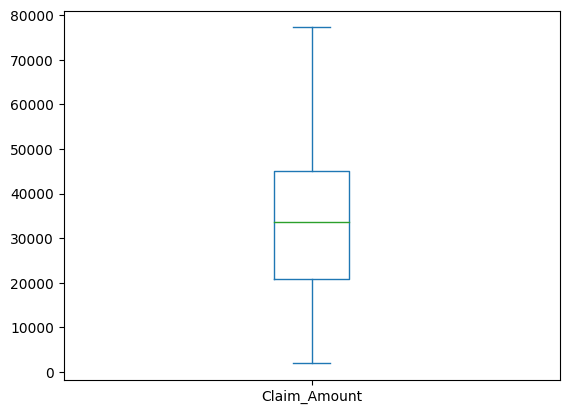

In [13]:
df.Claim_Amount.plot(kind='box')

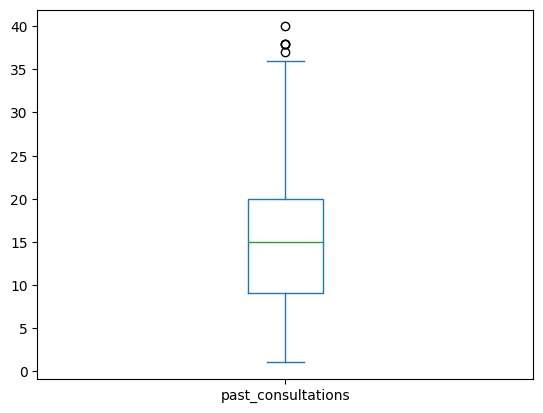

past_consultations
20.0    70
18.0    68
21.0    68
10.0    68
13.0    66
15.0    64
9.0     63
16.0    61
19.0    60
17.0    58
8.0     56
12.0    56
11.0    56
7.0     54
14.0    53
5.0     45
6.0     38
24.0    37
22.0    36
4.0     35
23.0    29
25.0    26
3.0     24
26.0    24
2.0     23
27.0    15
32.0    13
30.0    13
31.0    13
28.0     9
35.0     7
29.0     5
33.0     4
36.0     4
34.0     4
38.0     3
1.0      2
37.0     1
40.0     1
Name: count, dtype: int64

In [14]:
df.past_consultations.plot(kind='box')
plt.show()
df.past_consultations.value_counts().sort_values(ascending=False)

<Axes: >

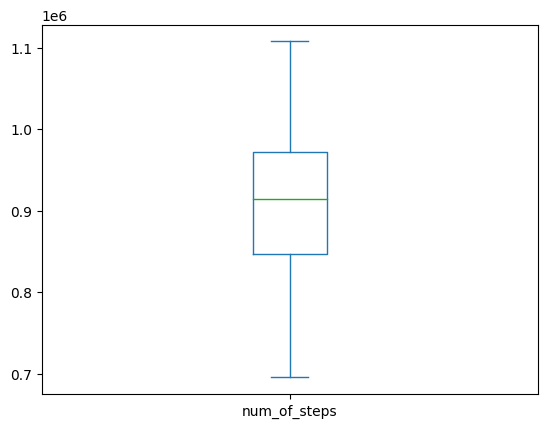

In [15]:
df.num_of_steps.plot(kind='box') # to check the outlier of num_of_step columns

<Axes: >

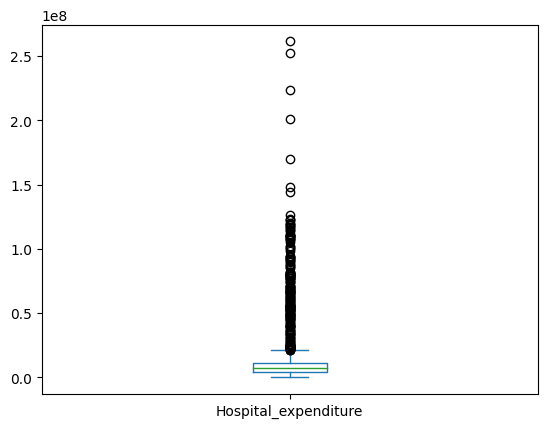

In [16]:
df.Hospital_expenditure.plot(kind='box') # checking the outlier in hospital expendture

In [17]:
hos_val_cou = df.NUmber_of_past_hospitalizations.value_counts()
print(hos_val_cou)
print()
print(df.NUmber_of_past_hospitalizations.unique())
print()
df[df.NUmber_of_past_hospitalizations==0]


NUmber_of_past_hospitalizations
1.0    957
2.0    227
0.0    150
3.0      2
Name: count, dtype: int64

[ 0. nan  1.  2.  3.]



,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,24.0,female,39.49,0.0,no,28484.27694,2.0,794069.0,9732880.065,0.0,26744630.29,southeast,2480.9791
147,27.0,male,23.10,0.0,no,31721.57390,1.0,782592.0,2155419.030,0.0,32307675.52,southeast,2483.7360
148,27.0,male,30.50,0.0,no,15140.99523,9.0,784987.0,2957529.180,0.0,15456751.74,southwest,2494.0220
149,27.0,male,32.67,0.0,no,24052.52152,20.0,781100.0,4761176.534,0.0,31076865.27,southeast,2497.0383


<Axes: ylabel='Frequency'>

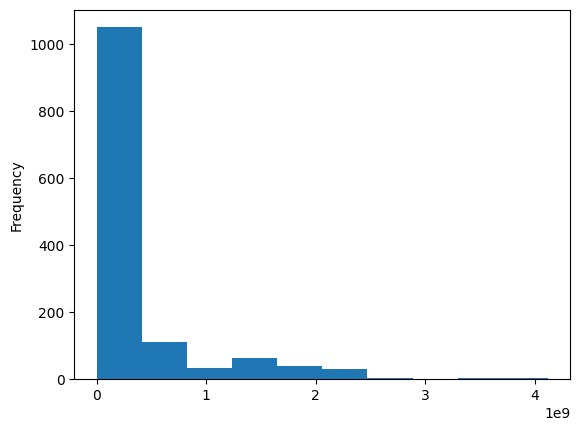

In [18]:
df.Anual_Salary.plot(kind='hist') # Distribution of anual Salary

In [19]:
df.region.value_counts() #Checking the distribution and what are the region present in dataset.

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

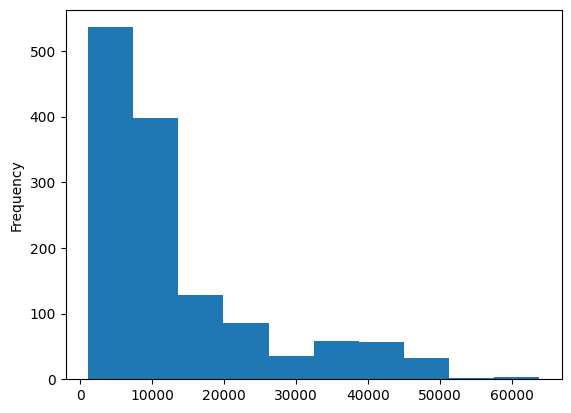

In [20]:
df.charges.plot(kind='hist')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [22]:
df.describe().round()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.0,1335.0,1333.0,1324.0,1332.0,1335.0,1334.0,1336.0,1.332000e+03,1338.0
mean,39.0,31.0,1.0,33361.0,15.0,910005.0,15841792.0,1.0,3.696849e+08,13270.0
std,14.0,6.0,1.0,15617.0,7.0,91886.0,26693048.0,1.0,5.668843e+08,12110.0
min,18.0,16.0,0.0,1920.0,1.0,695430.0,29453.0,0.0,2.747072e+06,1122.0
25%,27.0,26.0,0.0,20769.0,9.0,847200.0,4077633.0,1.0,7.701932e+07,4740.0
50%,39.0,30.0,1.0,33700.0,15.0,914300.0,7490337.0,1.0,1.419361e+08,9382.0
75%,51.0,35.0,2.0,45052.0,20.0,971684.0,10840822.0,1.0,3.243499e+08,16640.0
max,64.0,53.0,5.0,77278.0,40.0,1107872.0,261631699.0,3.0,4.117197e+09,63770.0


In [23]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

### Observation of dataset

**General**
* 13 columns and 1338 rows are present in dataset.

**Age Column** 
* It has a range of 18 to 64 aged people. Nine null values are present in it. there is no outliers present in it.

**Sex Column**
* There is no outlier and it is balanced level of male and female.

**BMI Column**
* it has 9 outliers which only present in upper bound. And 3 null values too.

**Children column**
* It has five null values and range 0-5.

**Smoker**
* there only 20% of induviduals are smoker in given dataset.

**Claim Amount Column**
* There is no outliers and it has 14 null values. the range between 1900 - 78000.

**Past consultation**
* It has 6 null values. the range between 1-40. It imples each person atleat they have experienced with one consultation before.

**Number of steps**
* There are 3 null values in it. it varies form from 6,98,000 to 11,07,900. It doesn't have any outliers.

**Hospital Expenditure**
* It has 4 null values and lot of outliers

**Number of past of Hospitalization**
* 11% fo indivuals nerver hospitalized.
* 71% of indivuals have hospitalized one time.
* 16% of indivuals have hospitilized two times.
* 0.1% of indivuals have hospitilized three times.

**Anual Salary**
* It has six null values. It is right skewed data.

**Region**
* There are four types of regieon and data has beed equally distributed.

**Charges**
* The range start from 1000 to 68000. The charges are right skewed distribustion.

In [24]:


df.rename(columns={df.columns[9]: 'hospitalization', df.columns[5]:'claim_amount',
                   df.columns[8]: 'hospital_expenditure', df.columns[10]:'anual_salary'}, inplace=True)


## Visualization

### Distribution of each column

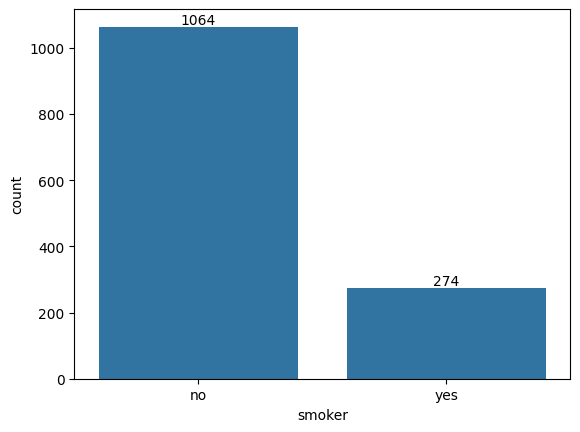

In [25]:
# Smoker Column
ax=sns.countplot(x=df['smoker'])
ax.bar_label(ax.containers[0])
plt.show()

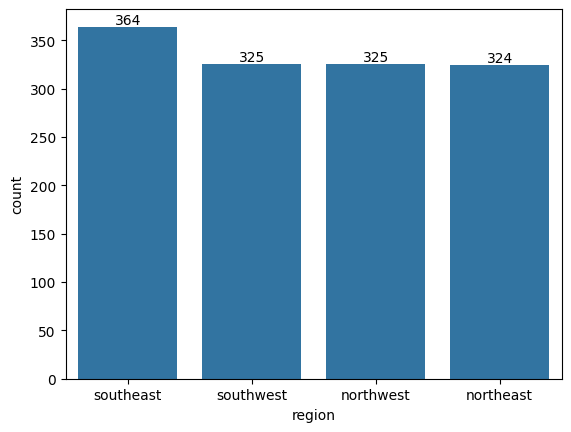

In [26]:
# Regieon columns
ax = sns.countplot(data=df,x='region')
ax.bar_label(ax.containers[0])
plt.show()

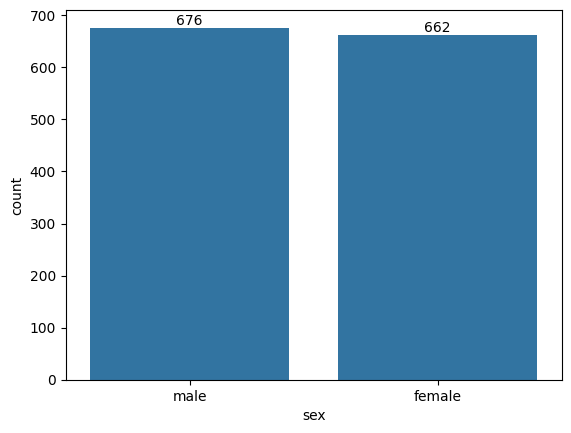

In [27]:
# Sex Column
ax = sns.countplot(data=df,x='sex')
ax.bar_label(ax.containers[0])
plt.show()

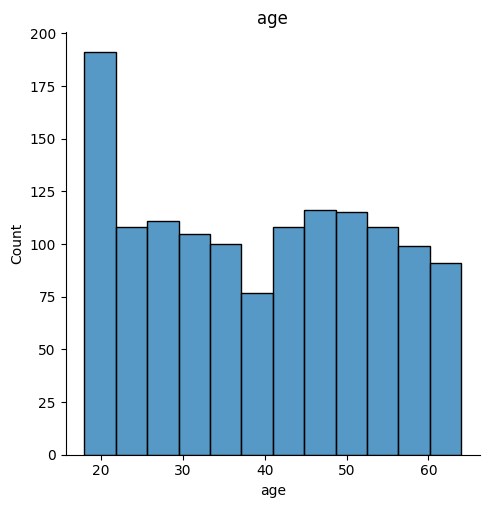

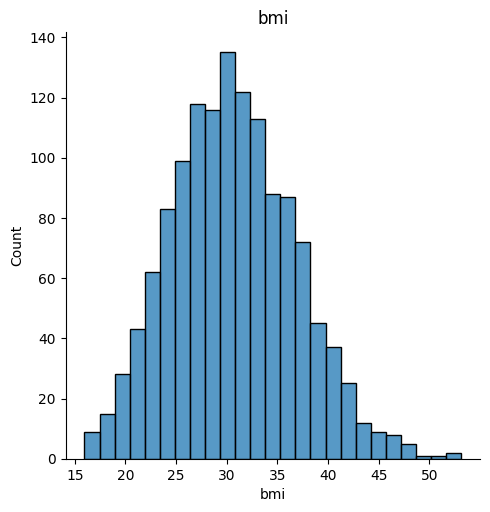

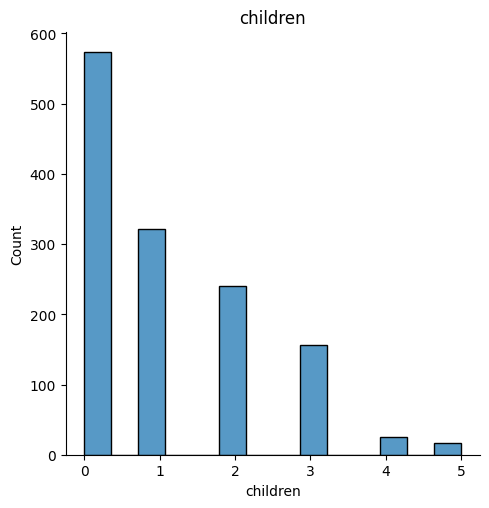

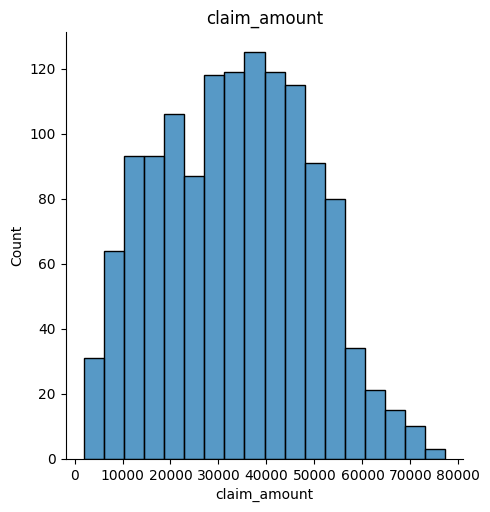

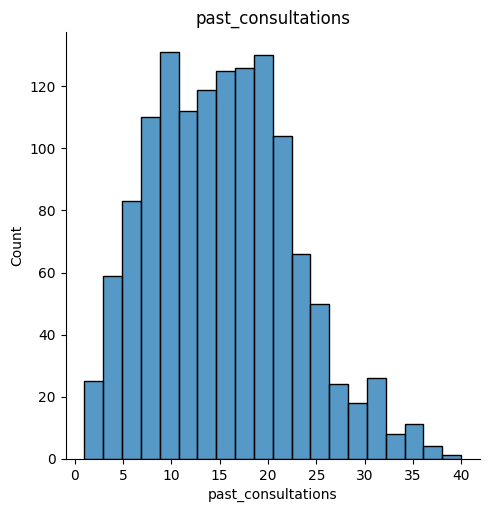

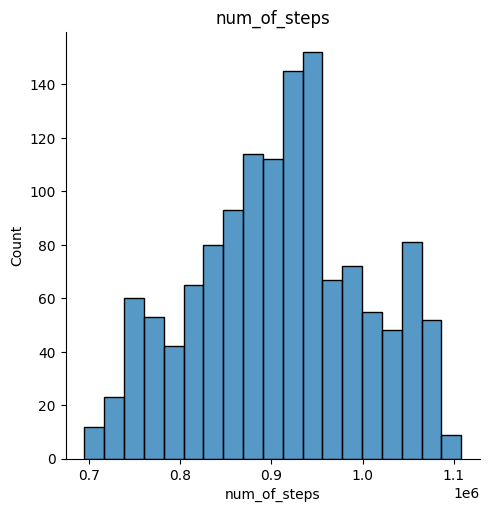

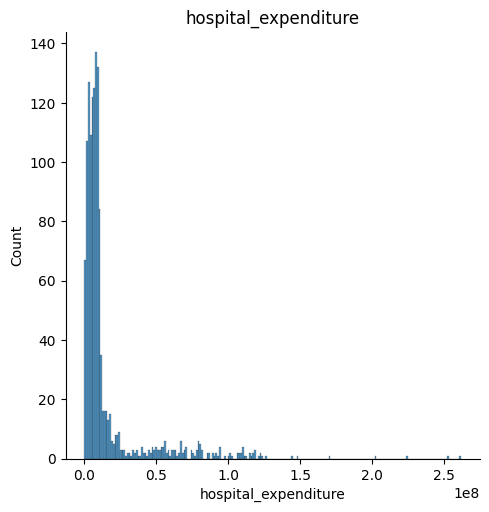

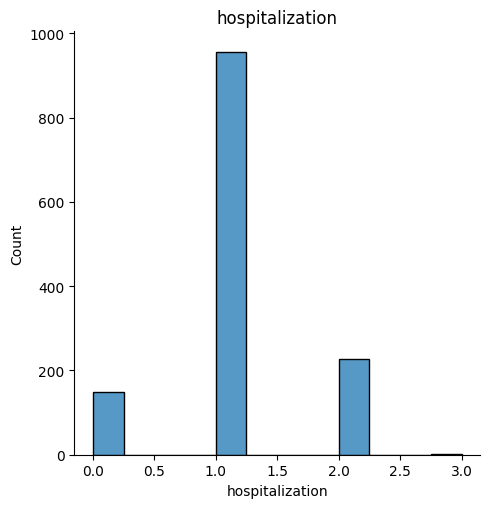

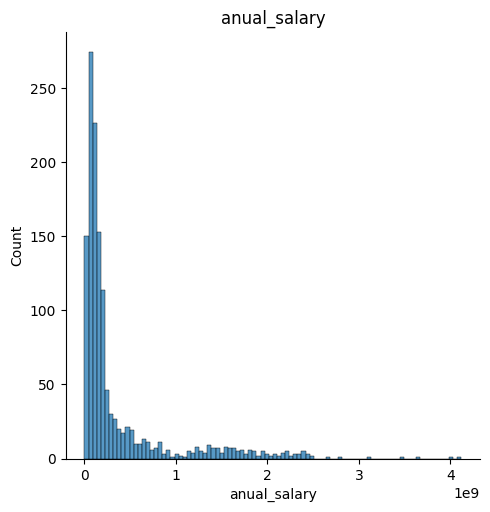

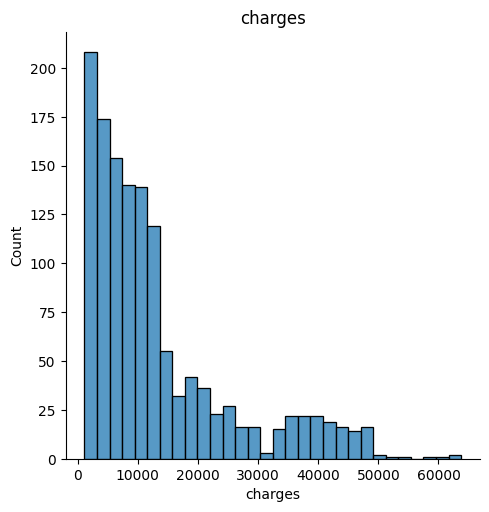

In [28]:
df_con_col = list(df.columns)
df_con_col.remove('smoker')
df_con_col.remove('region')
df_con_col.remove('sex')
for col in df_con_col:
    sns.displot(data=df,x=col)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    print()

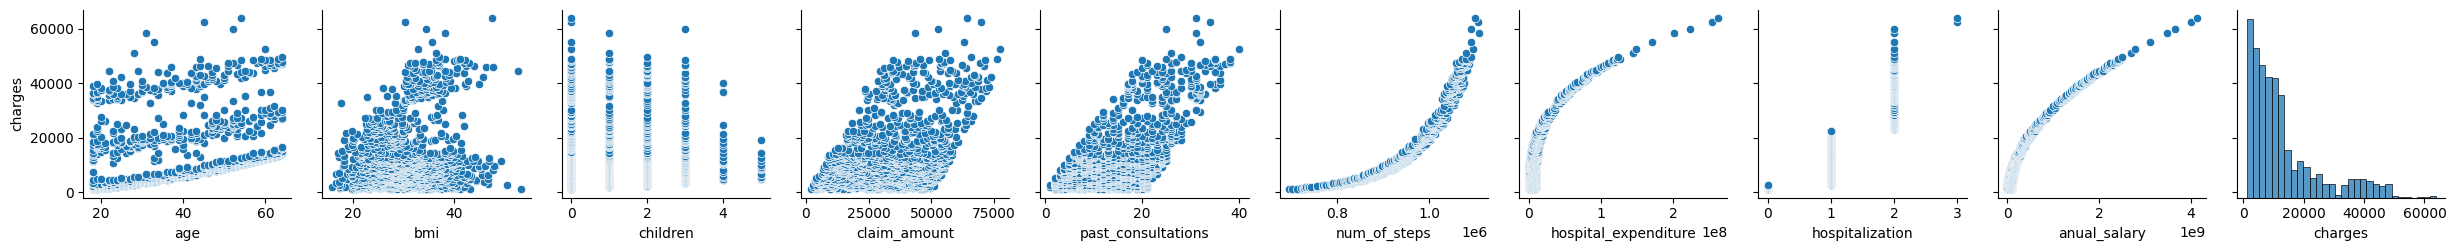

In [29]:
sns.pairplot(data=df,y_vars='charges')
plt.show()

**Interpretation from plot**
* Number of steps vs Charges has exponential relation.
* Hosptial Expenditure and Hospitalization vs Charges has inverse exponential relation.
* Age, Claim Amount and Past Consultation vs Charges has linear and positive correlation.


<Axes: xlabel='region', ylabel='charges'>

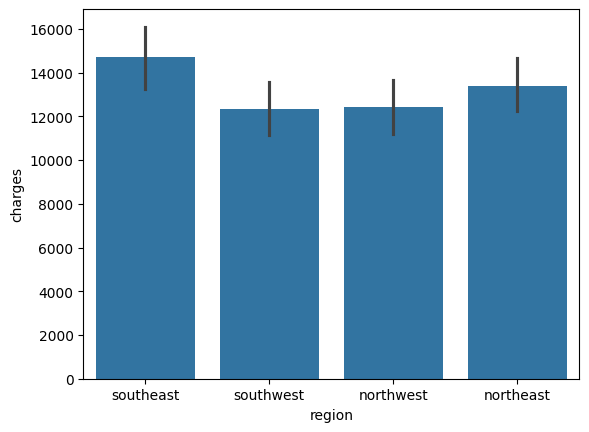

In [30]:
sns.barplot(data=df,x='region',y='charges',estimator='mean')

# Data Preporcessing

## Data Cleaning

The null values have replaced with mean if it is close to normal distribution else if skewed with median.

In [31]:
df.isna().sum()

age                      9
sex                      0
bmi                      3
children                 5
smoker                   0
claim_amount            14
past_consultations       6
num_of_steps             3
hospital_expenditure     4
hospitalization          2
anual_salary             6
region                   0
charges                  0
dtype: int64

In [32]:
df['age'] = df['age'].fillna(df.age.mean())
df['bmi'] = df['bmi'].fillna(df.bmi.mean())
df['children'] = df['children'].fillna(df.children.mode()[0])
df['claim_amount'] = df['claim_amount'].fillna(df.claim_amount.mean())
df['past_consultations'] = df['past_consultations'].fillna(df.past_consultations.mode()[0])
df['num_of_steps'] = df['num_of_steps'].fillna(df.num_of_steps.mean())
df['hospital_expenditure'] = df['hospital_expenditure'].fillna(df.hospital_expenditure.median())
df['anual_salary'] = df['anual_salary'].fillna(df.anual_salary.median())
df['hospitalization'] = df['hospitalization'].fillna(df.hospitalization.mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   float64
 1   sex                   1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   float64
 4   smoker                1338 non-null   object 
 5   claim_amount          1338 non-null   float64
 6   past_consultations    1338 non-null   float64
 7   num_of_steps          1338 non-null   float64
 8   hospital_expenditure  1338 non-null   float64
 9   hospitalization       1338 non-null   float64
 10  anual_salary          1338 non-null   float64
 11  region                1338 non-null   object 
 12  charges               1338 non-null   float64
dtypes: float64(10), object(3)
memory usage: 136.0+ KB


## Data Transfermation

In [33]:
df['sex'] = df.sex.replace({'male':0,'female':1}).astype(int)
df['smoker'] = df.smoker.replace({'no':0,'yes':1}).astype(int)


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df.region)
df.region

0       2
1       2
2       2
3       2
4       2
       ..
1333    1
1334    0
1335    1
1336    2
1337    2
Name: region, Length: 1338, dtype: int32

# Feature Selection

<Axes: >

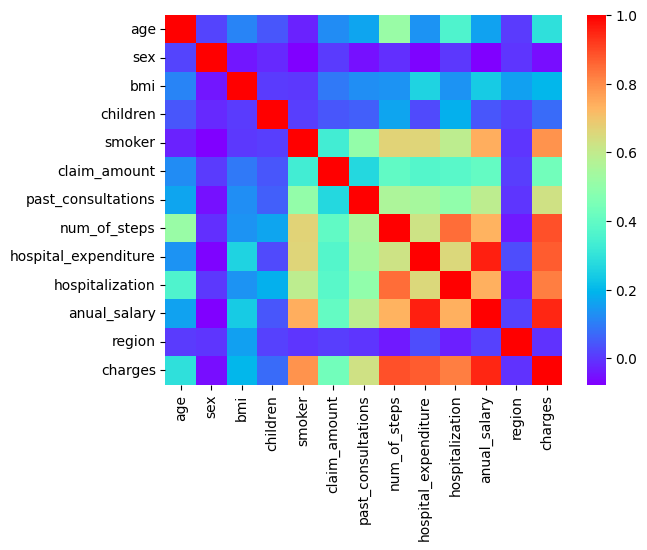

In [35]:
df_corr = df.corr()
sns.heatmap(df_corr,cmap='rainbow')

Interpretation of correlation plot, there is no strong correlation between chareges vs children, rerion and sex.

In [36]:
df.isna().sum()

age                     0
sex                     0
bmi                     0
children                0
smoker                  0
claim_amount            0
past_consultations      0
num_of_steps            0
hospital_expenditure    0
hospitalization         0
anual_salary            0
region                  0
charges                 0
dtype: int64

In [37]:
# Final Check up
# import sweetviz

In [38]:
# report = sweetviz.analyze(df)
# report.show_html('report.html') # creating a report of data set

## Feature Engineering

### Test Train Split

In [39]:
from sklearn.model_selection import train_test_split

y = df['charges']
X = df.drop(['charges', 'bmi', 'region', 'sex', 'children'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Standardization

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
y_train_arr = y_train.values
y_train = y_train_arr.reshape(-1,1)
y_train = sc.fit_transform(y_train)

In [42]:
print(X_train.shape)
print(y_train.shape)

(1070, 8)
(1070, 1)


# Model Building

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Making Prediction

In [45]:
pred = model.predict(X_test)

In [ ]:
prediction = sc.inverse_transform(pred) # get the data to same unit

# Model Evaluation

In [50]:
from sklearn.metrics import *

In [51]:
r2_score(y_test,prediction)

0.9711909464882358